In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Load data
df = pd.read_csv('analysis.csv')
df.head()

File Name  Cores Number  \
0  debug_amazon0302_mtx_k6_cores10_chunks1_cpus10            10   
1   debug_amazon0302_mtx_k6_cores10_chunks2_cpus5            10   
2   debug_amazon0302_mtx_k6_cores10_chunks5_cpus2            10   
3  debug_amazon0302_mtx_k6_cores11_chunks1_cpus11            11   
4  debug_amazon0302_mtx_k6_cores12_chunks1_cpus12            12   

   Sparse Matrix Dense Vector  Serial Algo Execution time  Setup time  \
0  262111x262111     262111x6                    0.249795    0.181513   
1  262111x262111     262111x6                    0.248867    0.186647   
2  262111x262111     262111x6                    0.249770    0.181781   
3  262111x262111     262111x6                    0.258330    0.199210   
4  262111x262111     262111x6                    0.258328    0.196613   

   Row-wise Average Communication Time  Row-wise Average Computation Time  \
0                             0.005861                           0.023370   
1                             0.006962                           0.022317   
2                             0.006742                           0.022383   
3                             0.007062                           0.021757   
4                             0.006483                           0.021157   

   Row-wise Execution time Row-wise Result  ...  Column-wise Execution time  \
0                 0.186158            same  ...                    0.556973   
1                 0.184458            same  ...                    0.561190   
2                 0.184903            same  ...                    0.567777   
3                 0.189903            same  ...                    0.566824   
4                 0.191625            same  ...                    0.574975   

   Column-wise Result  Non-zero elements Average Communication Time  \
0                same                                      0.022976   
1                same                                      0.024186   
2                same                                      0.025124   
3                same                                      0.020659   
4                same                                      0.020921   

  Non-zero elements Average Computation Time  \
0                                   0.037995   
1                                   0.038456   
2                                   0.038590   
3                                   0.037642   
4                                   0.036663   

   Non-zero Elements Execution time  Non-zero Elements Result  \
0                          0.203027                      same   
1                          0.203264                      same   
2                          0.201750                      same   
3                          0.208661                      same   
4                          0.214841                      same   

   PETSc Setup time PETSc Execution time  PETSc Conversion time  PETSc Result  
0           1.55525             0.141233                1.39916          same  
1           1.55102             0.142300                1.41968          same  
2           1.54439             0.139843                1.41760          same  
3           1.65224             0.130785                1.46719          same  
4           1.56365             0.129279                1.43934          same  

[5 rows x 22 columns]

In [3]:
# Extract data from file name
def extract_data(file_name):
    match = re.search(r'debug_(\w+)_mtx_k(\d+)_cores(\d+)_chunks(\d+)_cpus(\d+)', file_name)
    if match:
        name = match.group(1)  # Corrected to capture the correct group for name
        k_value = int(match.group(2))  # Corrected group number
        chunks = int(match.group(4))  # Corrected group number
        cpus_per_chunk = int(match.group(5))  # Corrected group number
        return name, k_value, chunks, cpus_per_chunk
    else:
        return None, None, None, None


In [4]:

# Apply the function to the dataframe
df[['Sparse Matrix Name', 'k', 'Chunks', 'CPUs per Chunk']] = df.apply(lambda row: extract_data(row['File Name']), axis=1, result_type='expand')

df.head()

File Name  Cores Number  \
0  debug_amazon0302_mtx_k6_cores10_chunks1_cpus10            10   
1   debug_amazon0302_mtx_k6_cores10_chunks2_cpus5            10   
2   debug_amazon0302_mtx_k6_cores10_chunks5_cpus2            10   
3  debug_amazon0302_mtx_k6_cores11_chunks1_cpus11            11   
4  debug_amazon0302_mtx_k6_cores12_chunks1_cpus12            12   

   Sparse Matrix Dense Vector  Serial Algo Execution time  Setup time  \
0  262111x262111     262111x6                    0.249795    0.181513   
1  262111x262111     262111x6                    0.248867    0.186647   
2  262111x262111     262111x6                    0.249770    0.181781   
3  262111x262111     262111x6                    0.258330    0.199210   
4  262111x262111     262111x6                    0.258328    0.196613   

   Row-wise Average Communication Time  Row-wise Average Computation Time  \
0                             0.005861                           0.023370   
1                             0.006962                           0.022317   
2                             0.006742                           0.022383   
3                             0.007062                           0.021757   
4                             0.006483                           0.021157   

   Row-wise Execution time Row-wise Result  ...  \
0                 0.186158            same  ...   
1                 0.184458            same  ...   
2                 0.184903            same  ...   
3                 0.189903            same  ...   
4                 0.191625            same  ...   

   Non-zero Elements Execution time  Non-zero Elements Result  \
0                          0.203027                      same   
1                          0.203264                      same   
2                          0.201750                      same   
3                          0.208661                      same   
4                          0.214841                      same   

   PETSc Setup time PETSc Execution time  PETSc Conversion time  PETSc Result  \
0           1.55525             0.141233                1.39916          same   
1           1.55102             0.142300                1.41968          same   
2           1.54439             0.139843                1.41760          same   
3           1.65224             0.130785                1.46719          same   
4           1.56365             0.129279                1.43934          same   

   Sparse Matrix Name  k  Chunks  CPUs per Chunk  
0          amazon0302  6       1              10  
1          amazon0302  6       2               5  
2          amazon0302  6       5               2  
3          amazon0302  6       1              11  
4          amazon0302  6       1              12  

[5 rows x 26 columns]

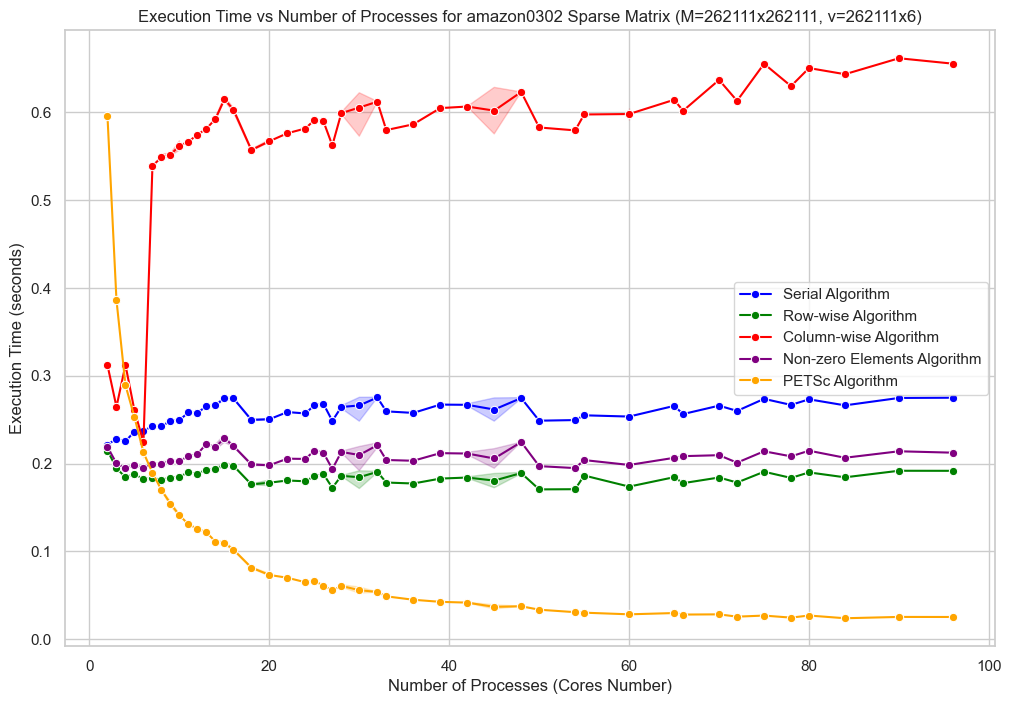

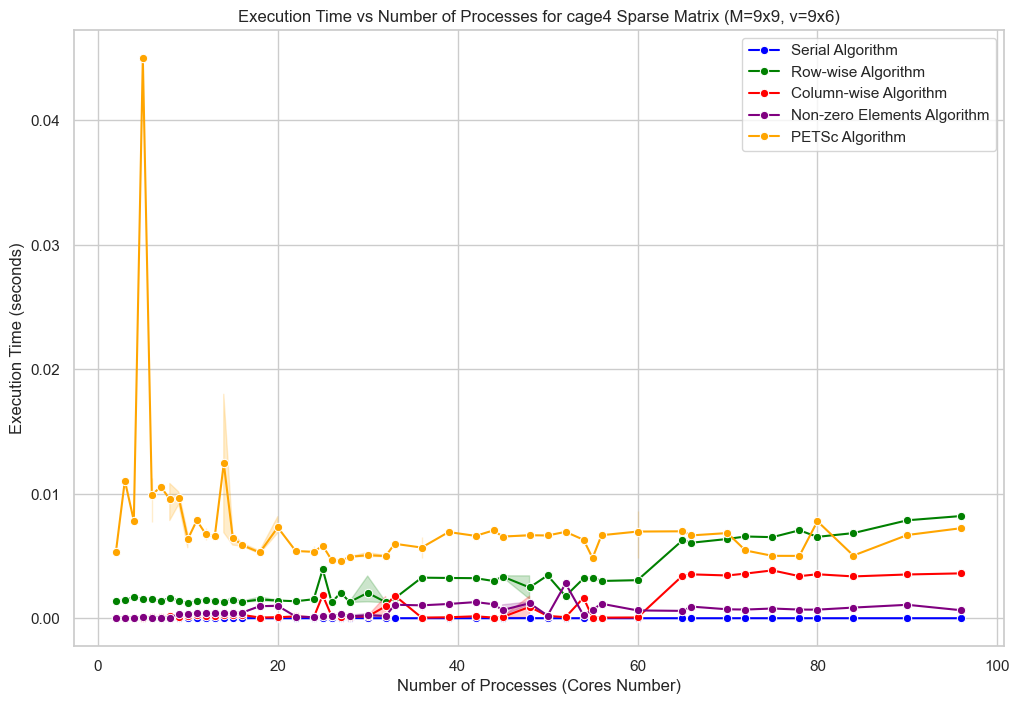

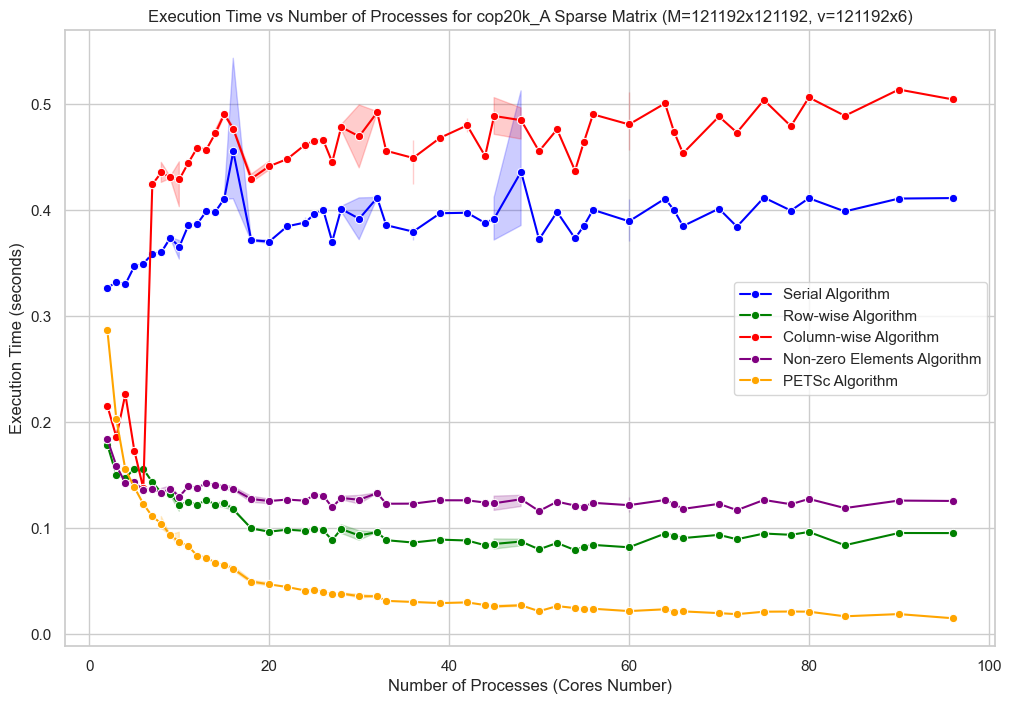

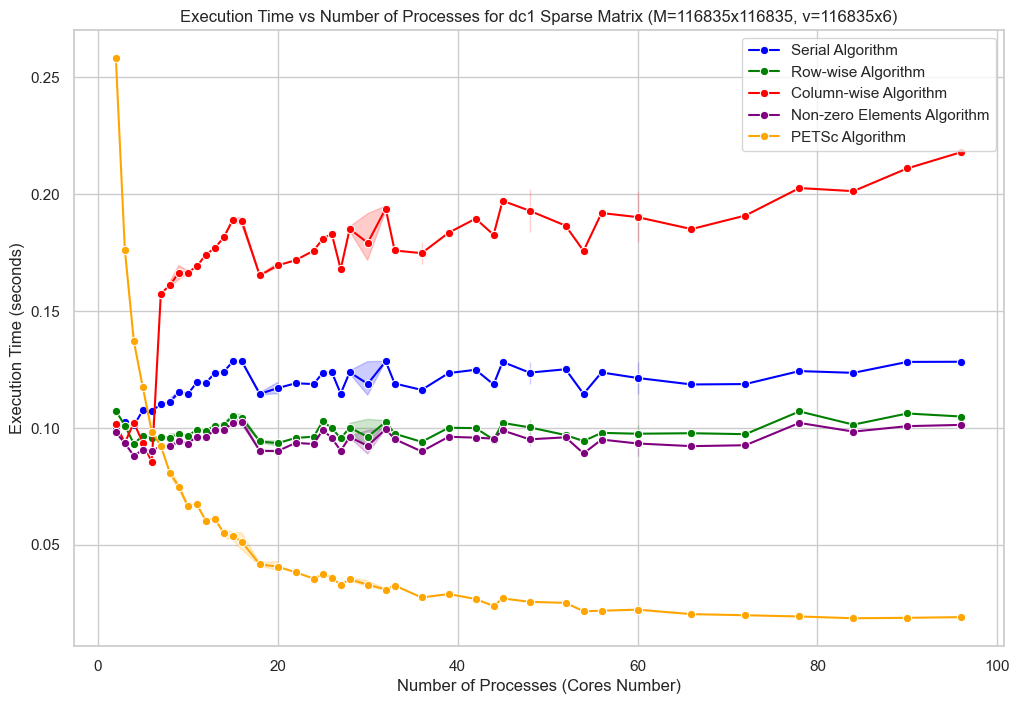

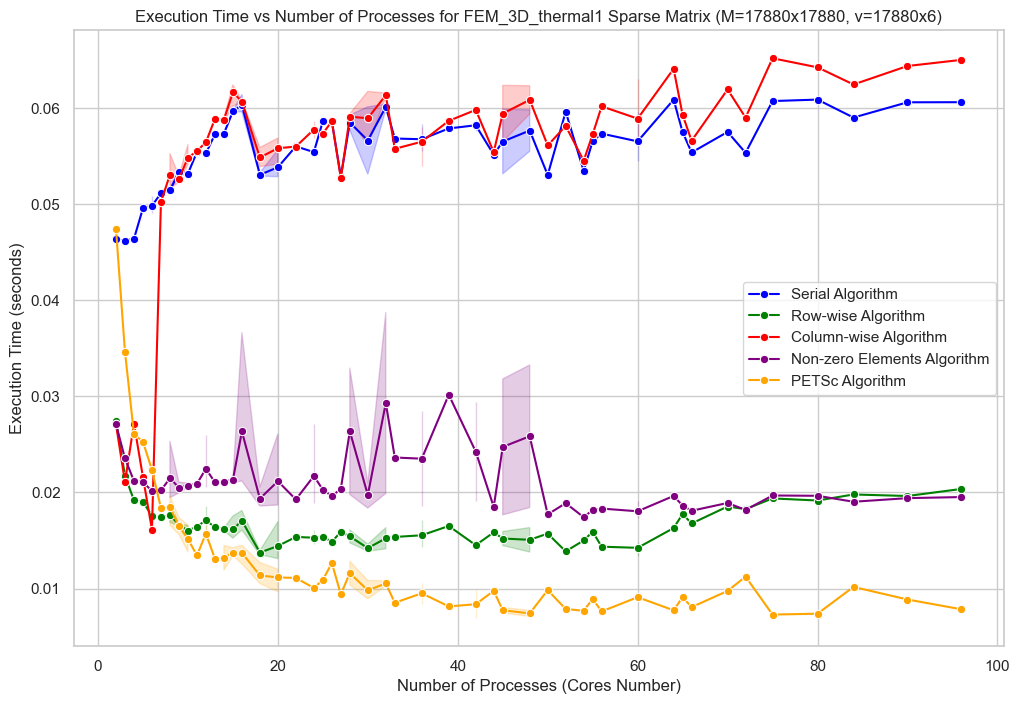

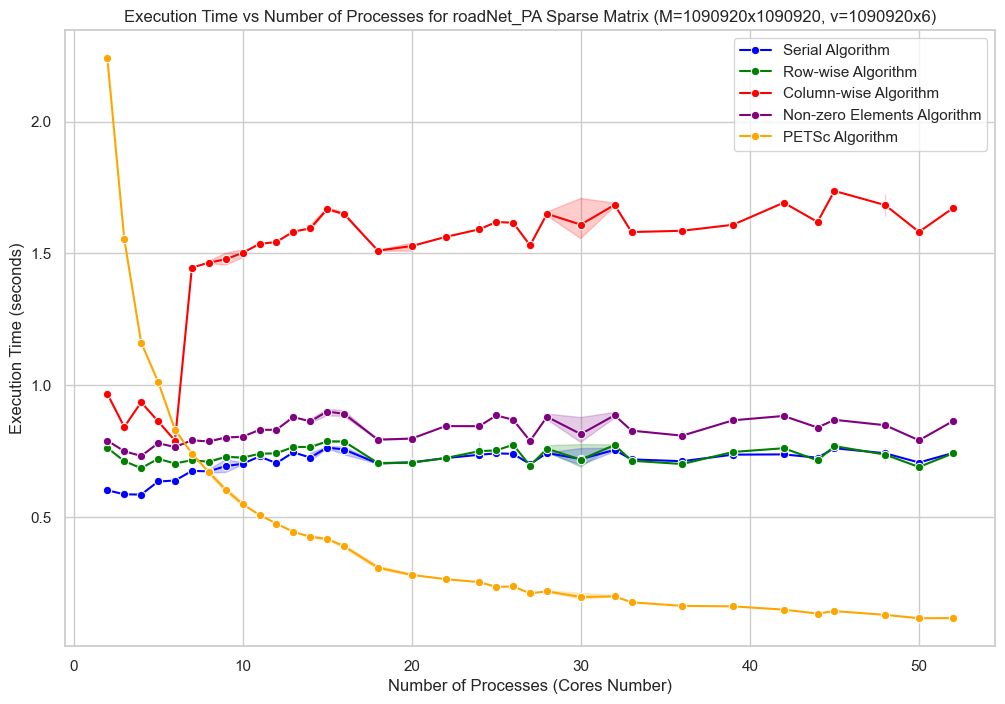

In [16]:
names = df["Sparse Matrix Name"].unique()

for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(
        x="Cores Number",
        y="Serial Algo Execution time",
        data=df_sorted,
        marker="o",
        label="Serial Algorithm",
        color="blue",
    )
    sns.lineplot(
        x="Cores Number",
        y="Row-wise Execution time",
        data=df_sorted,
        marker="o",
        label="Row-wise Algorithm",
        color="green",
    )
    sns.lineplot(
        x="Cores Number",
        y="Column-wise Execution time",
        data=df_sorted,
        marker="o",
        label="Column-wise Algorithm",
        color="red",
    )
    sns.lineplot(
        x="Cores Number",
        y="Non-zero Elements Execution time",
        data=df_sorted,
        marker="o",
        label="Non-zero Elements Algorithm",
        color="purple",
    )
    sns.lineplot(
        x="Cores Number",
        y="PETSc Execution time",
        data=df_sorted,
        marker="o",
        label="PETSc Algorithm",
        color="orange",
    )

    plt.xlabel("Number of Processes (Cores Number)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Execution Time vs Number of Processes for {name} Sparse Matrix (M={df_sorted['Sparse Matrix'].iloc[0]}, v={df_sorted['Dense Vector'].iloc[0]})")
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig("./matrix_dim/" + name + "_k6_execution_time.png")

    plt.show()

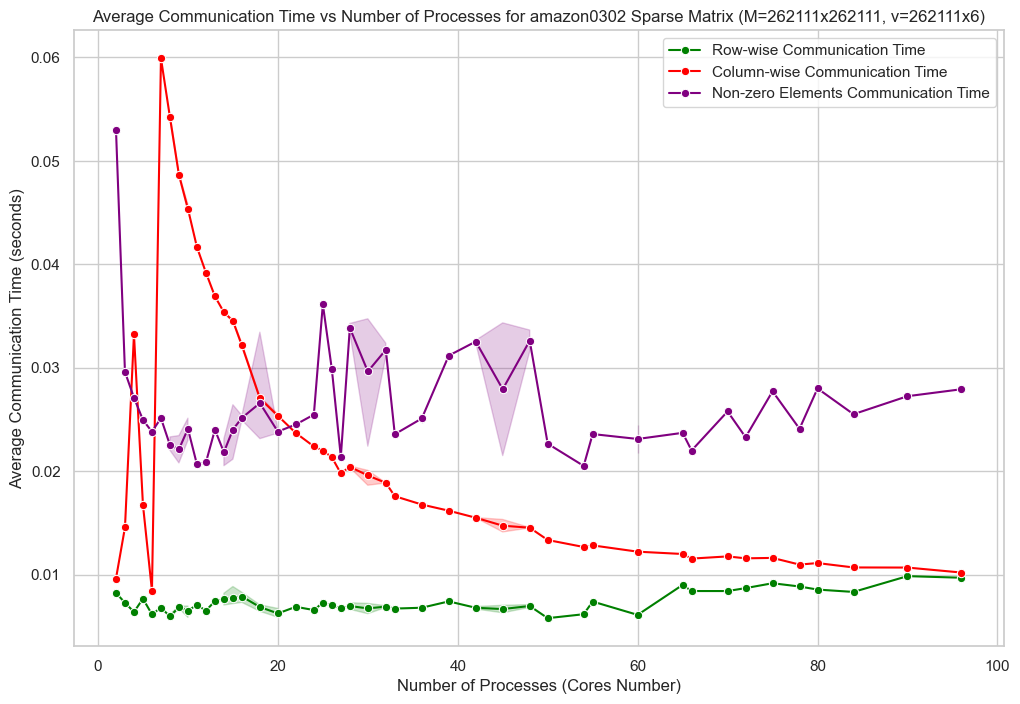

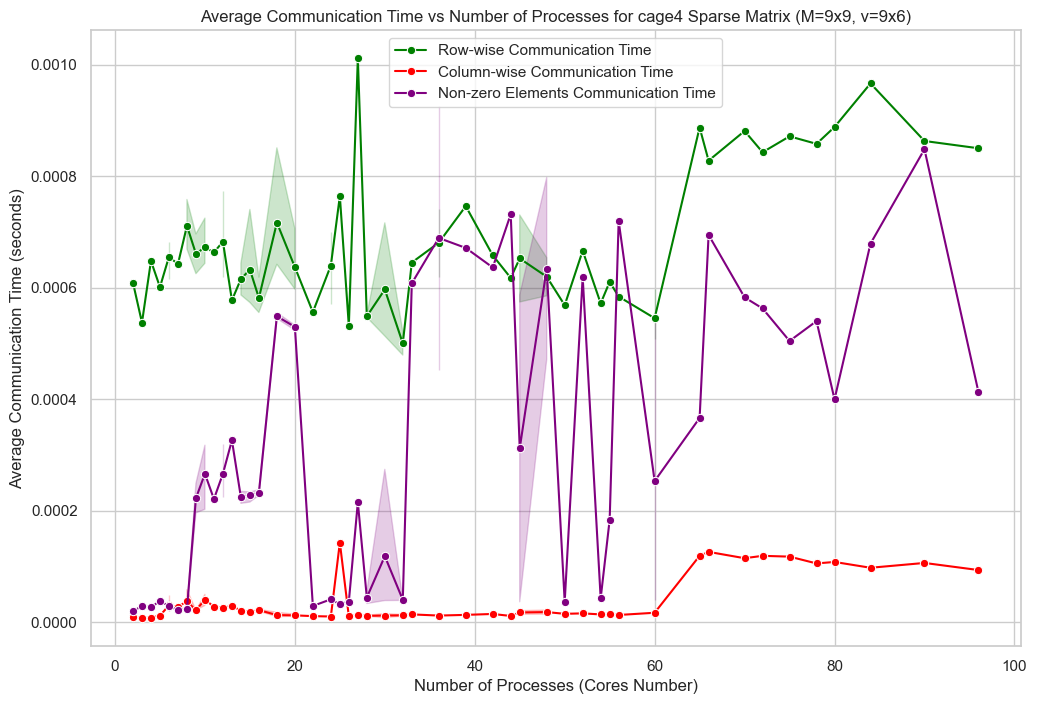

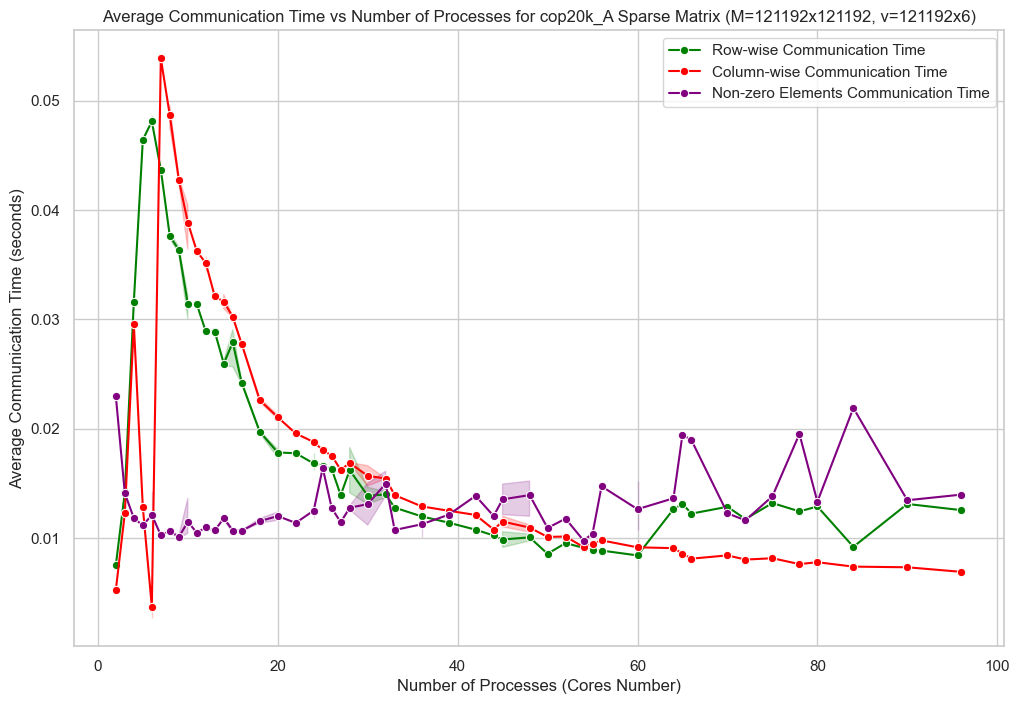

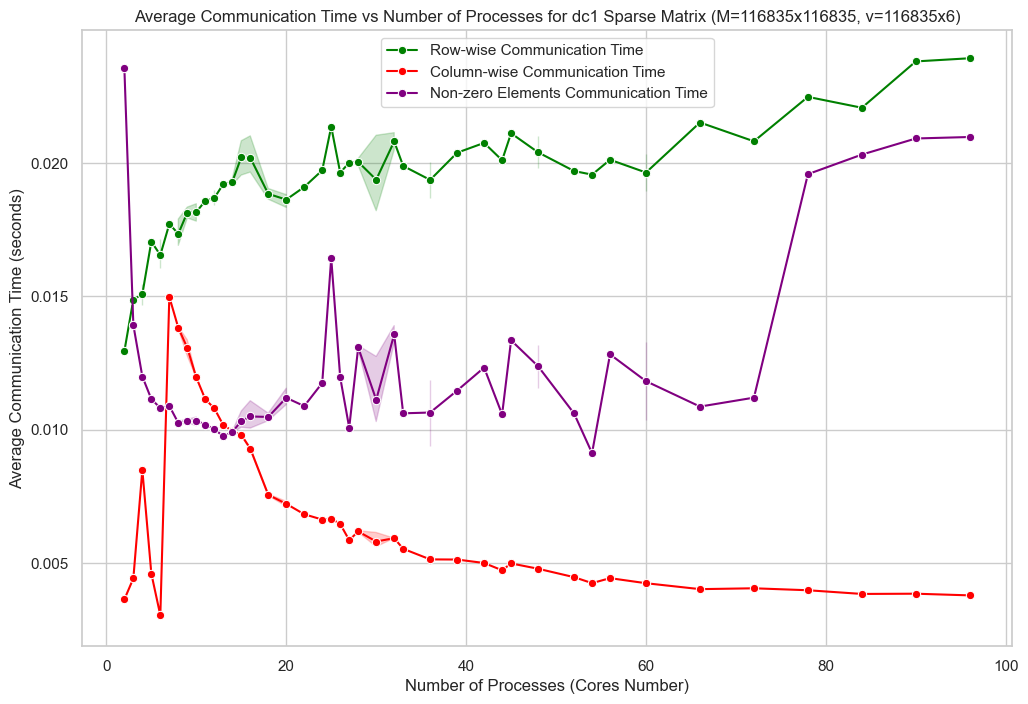

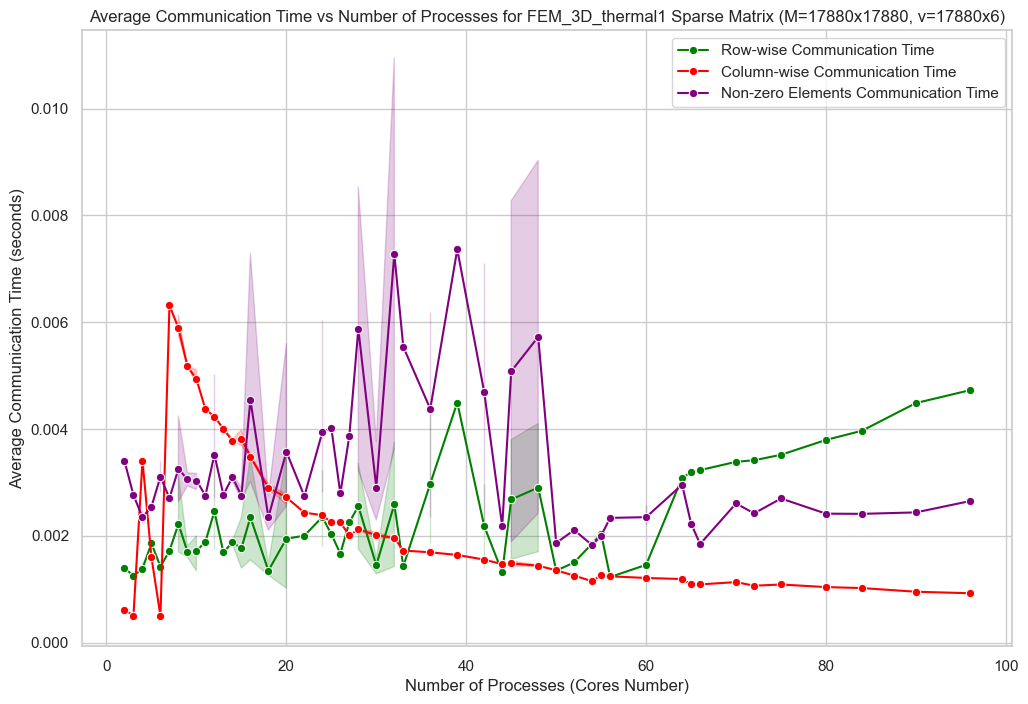

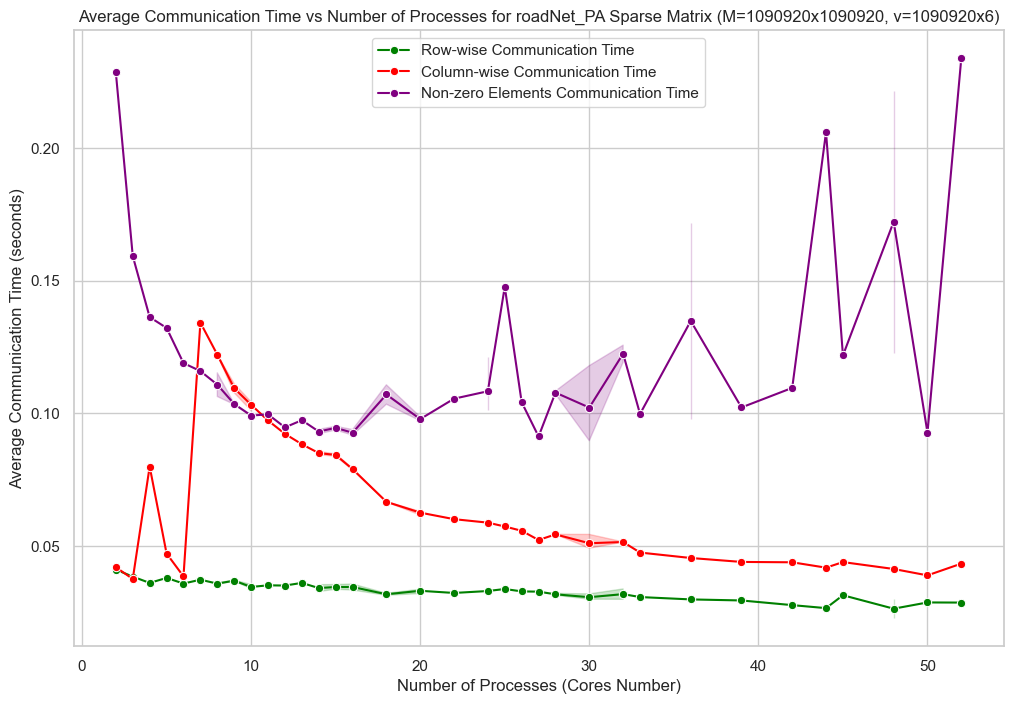

In [18]:

for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Row-wise Communication Time
    sns.lineplot(x='Cores Number', y='Row-wise Average Communication Time', data=df_sorted, marker='o', label='Row-wise Communication Time', color='green')

    # Column-wise Communication Time
    sns.lineplot(x='Cores Number', y='Column-wise Average Communication Time', data=df_sorted, marker='o', label='Column-wise Communication Time', color='red')

    # Non-zero elements Communication Time
    sns.lineplot(x='Cores Number', y='Non-zero elements Average Communication Time', data=df_sorted, marker='o', label='Non-zero Elements Communication Time', color='purple')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Average Communication Time (seconds)')
    plt.title(f"Average Communication Time vs Number of Processes for {name} Sparse Matrix (M={df_sorted['Sparse Matrix'].iloc[0]}, v={df_sorted['Dense Vector'].iloc[0]})")
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('./matrix_dim/' + name + '_k6_communication_time.png')

    plt.show()

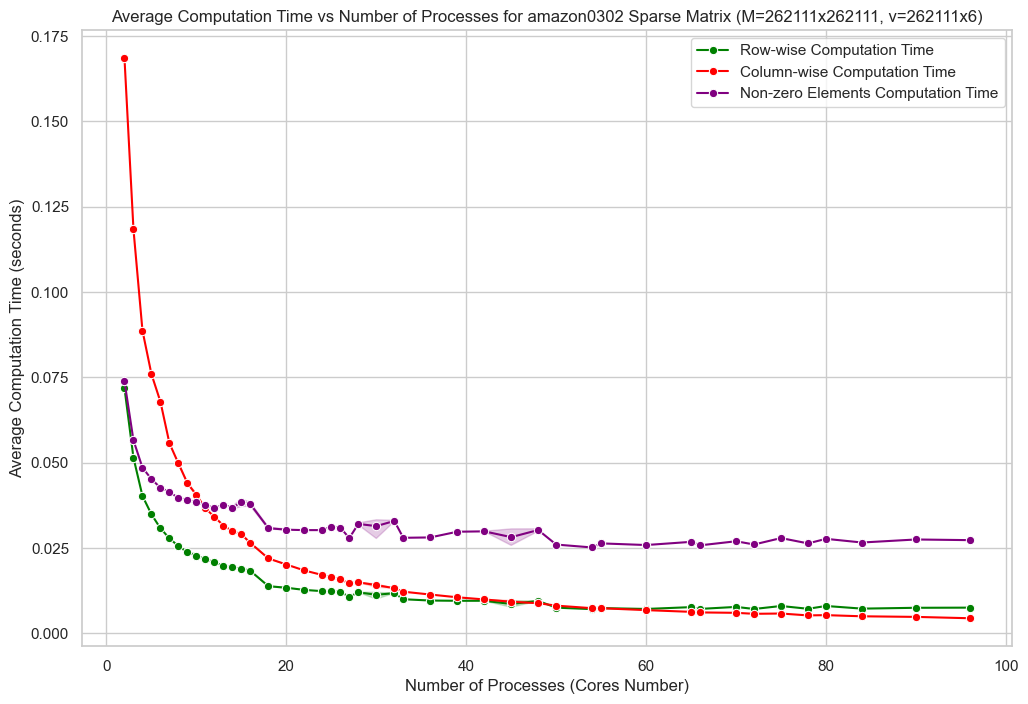

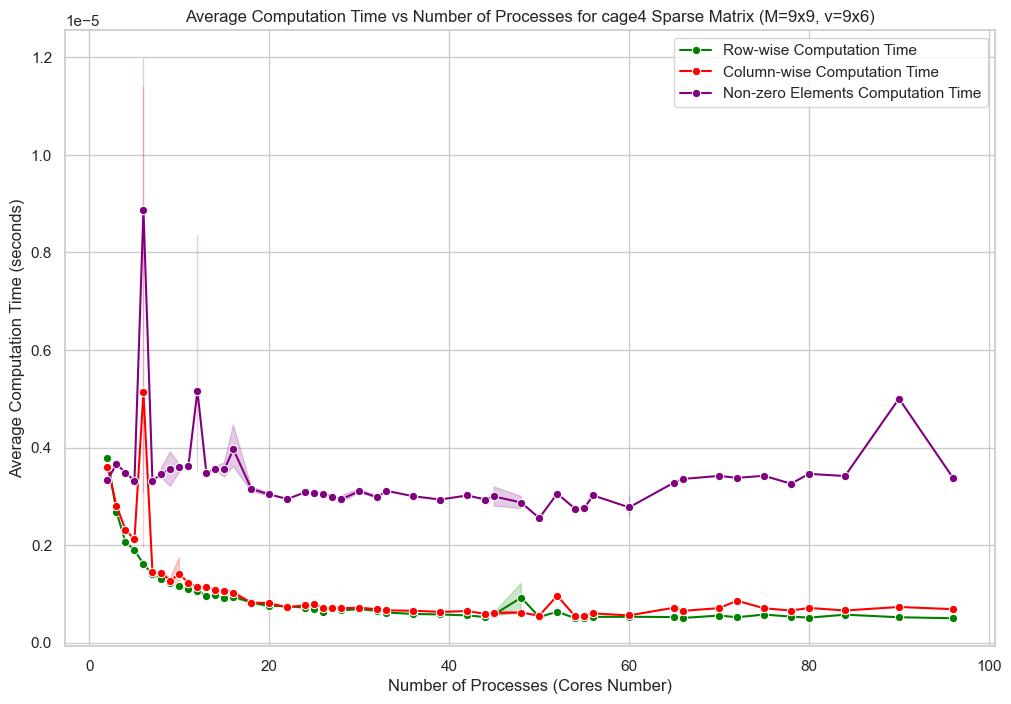

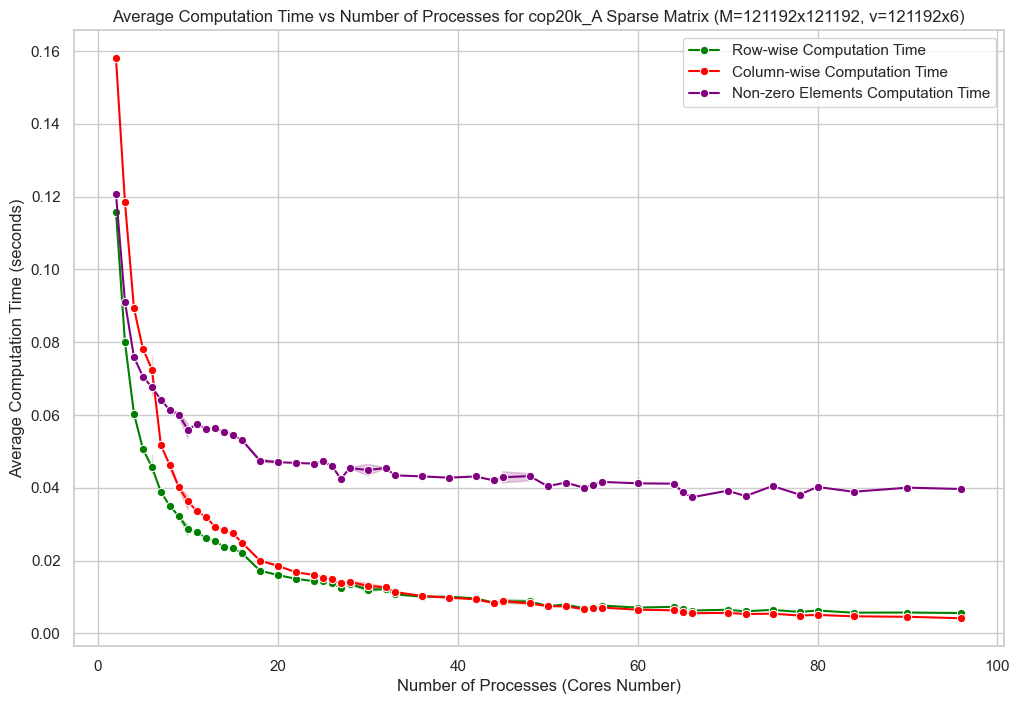

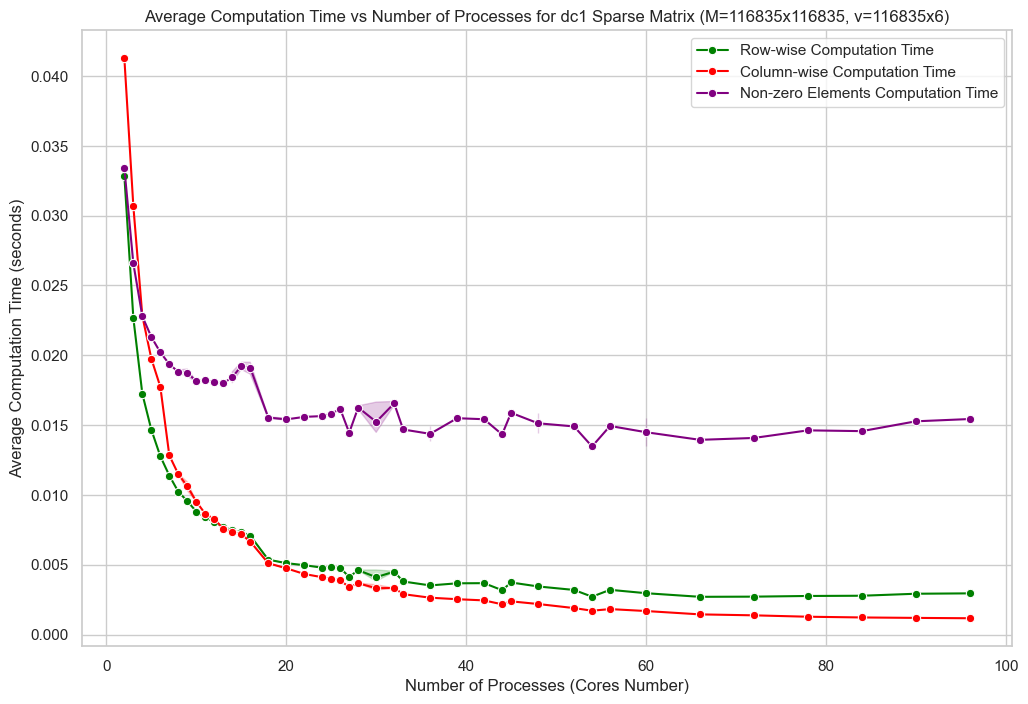

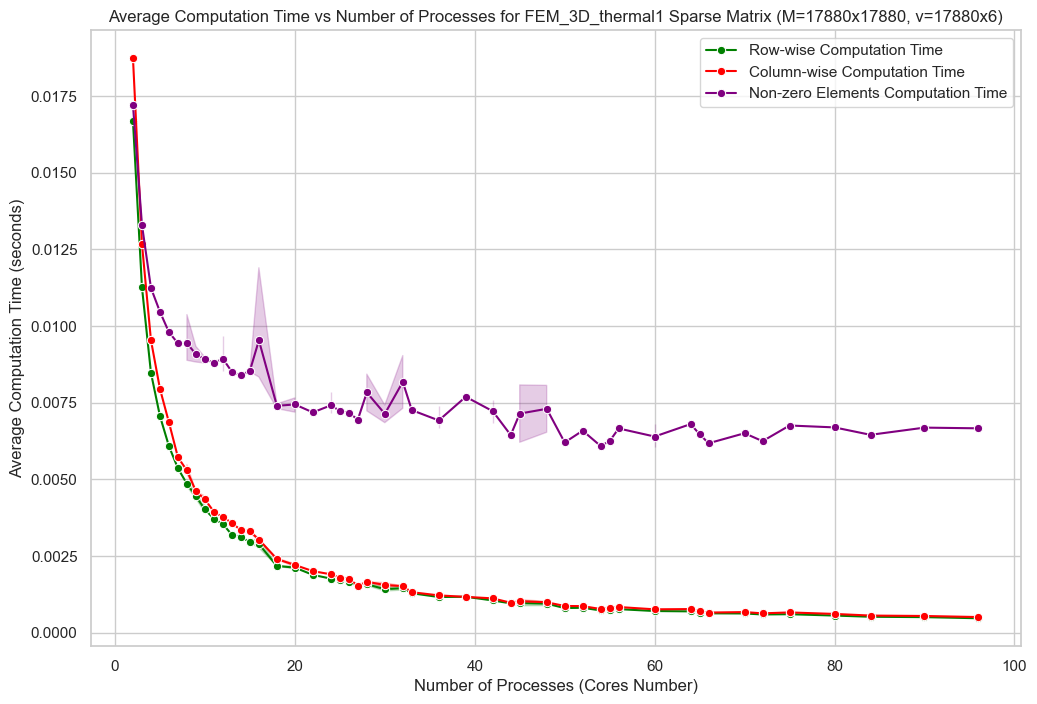

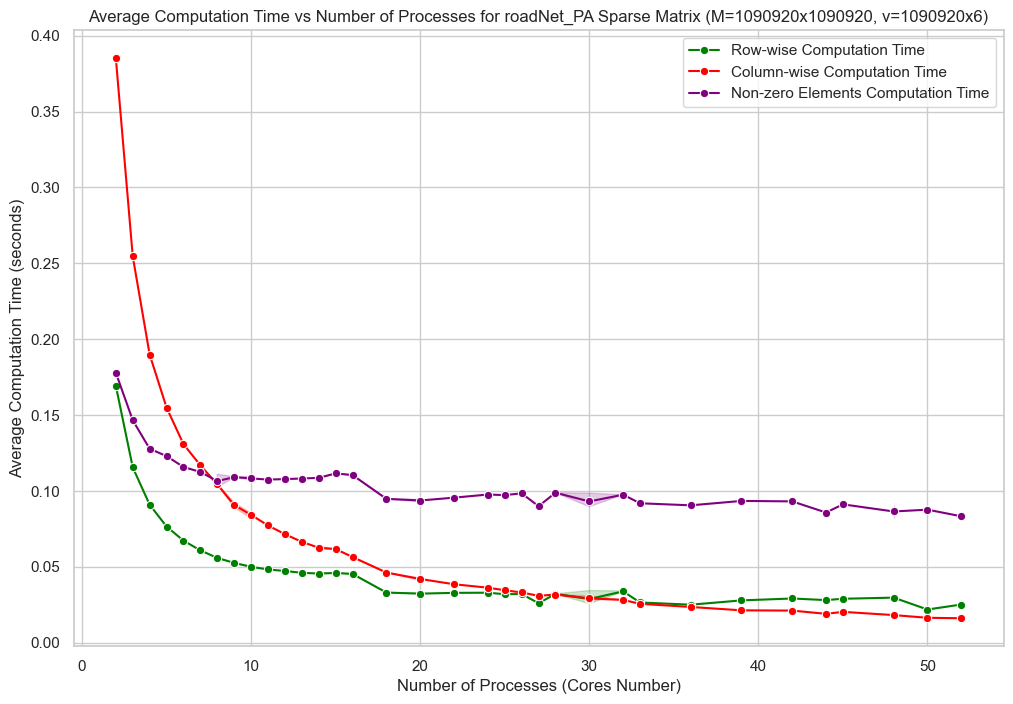

In [ ]:
for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Row-wise Computation Time
    sns.lineplot(x='Cores Number', y='Row-wise Average Computation Time', data=df_sorted, marker='o', label='Row-wise Computation Time', color='green')

    # Column-wise Computation Time
    sns.lineplot(x='Cores Number', y='Column-wise Average Computation Time', data=df_sorted, marker='o', label='Column-wise Computation Time', color='red')

    # Non-zero elements Computation Time
    sns.lineplot(x='Cores Number', y='Non-zero elements Average Computation Time', data=df_sorted, marker='o', label='Non-zero Elements Computation Time', color='purple')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Average Computation Time (seconds)')
    plt.title(f"Average Computation Time vs Number of Processes for {name} Sparse Matrix (M={df_sorted["Sparse Matrix"].iloc[0]}, v={df_sorted["Dense Vector"].iloc[0]})")
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('./matrix_dim/' + name + '_k6_computation_time.png')

    plt.show()

In [ ]:
df.insert(0, 'Total Row-Wise Execution Time', df['Row-wise Execution time'] + df['Setup time'])
df.insert(0, 'Total Column-Wise Execution Time', df['Column-wise Execution time'] + df['Setup time'])
df.insert(0, 'Total Non-zero Elements Execution Time', df['Non-zero Elements Execution time'] + df['Setup time'])
df.insert(0, 'Total PETSc Execution Time', df['PETSc Execution time'] + df['PETSc Setup time'] + df['PETSc Conversion time'])

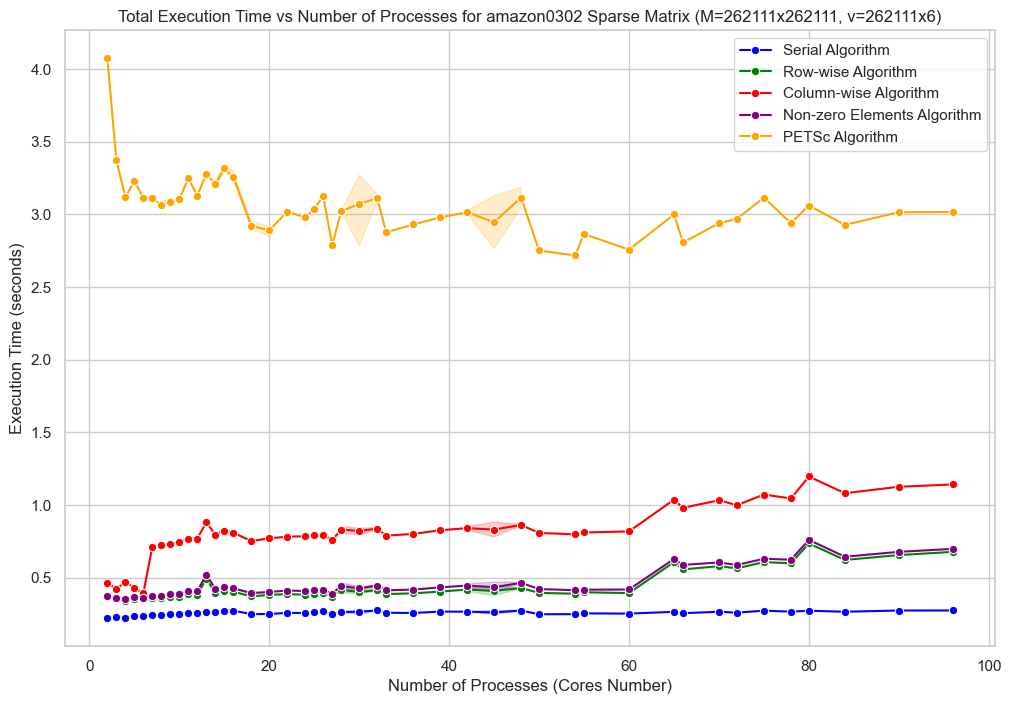

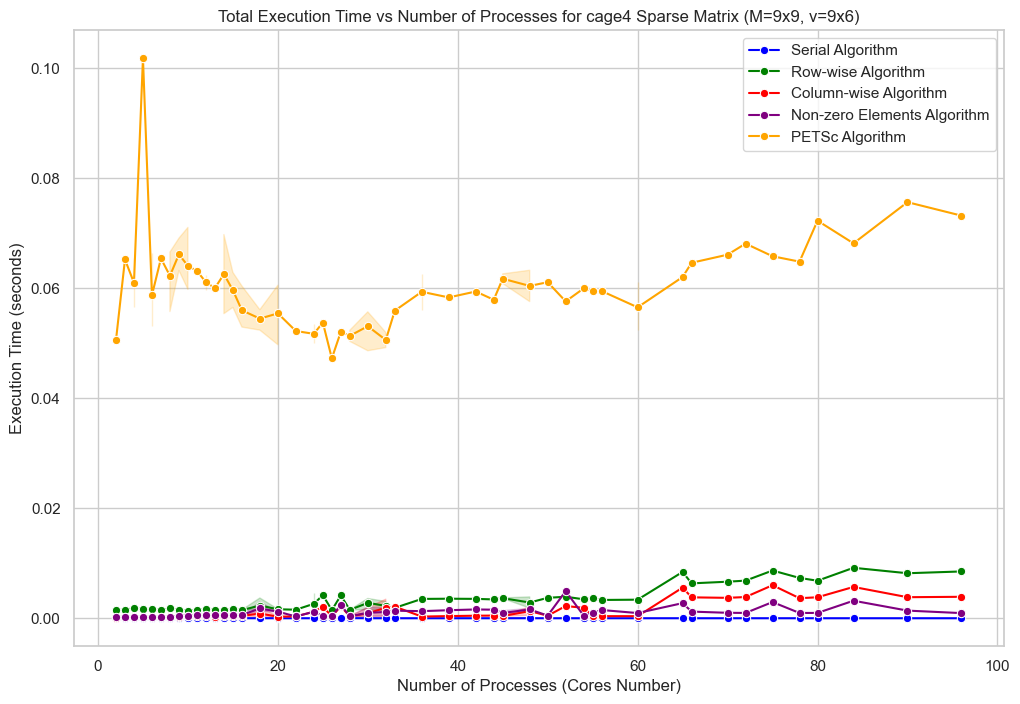

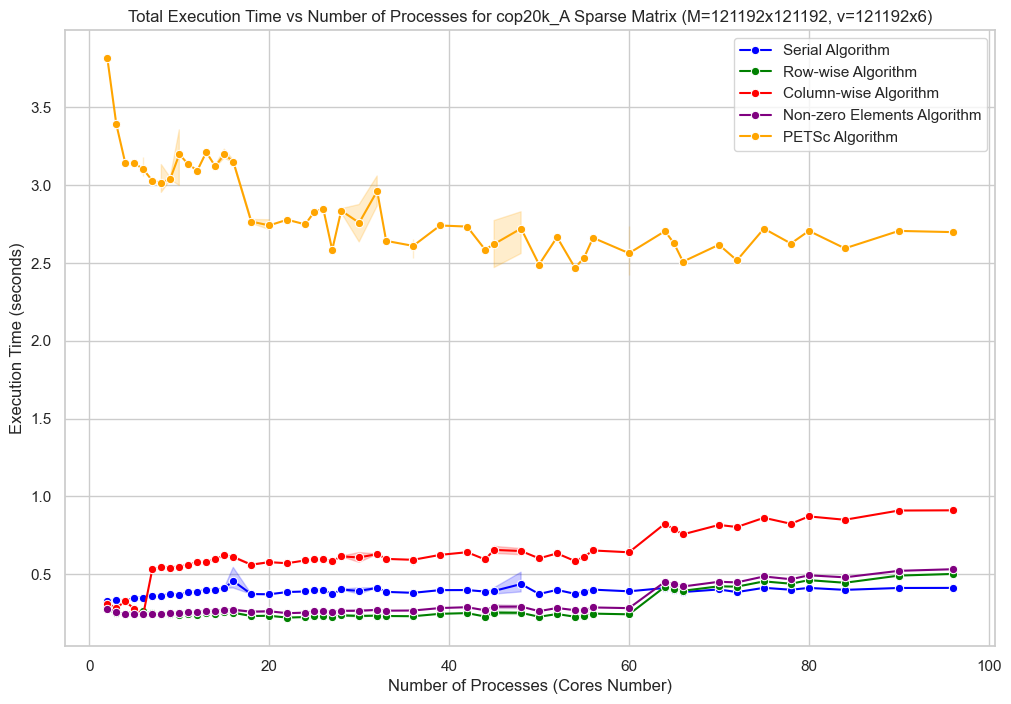

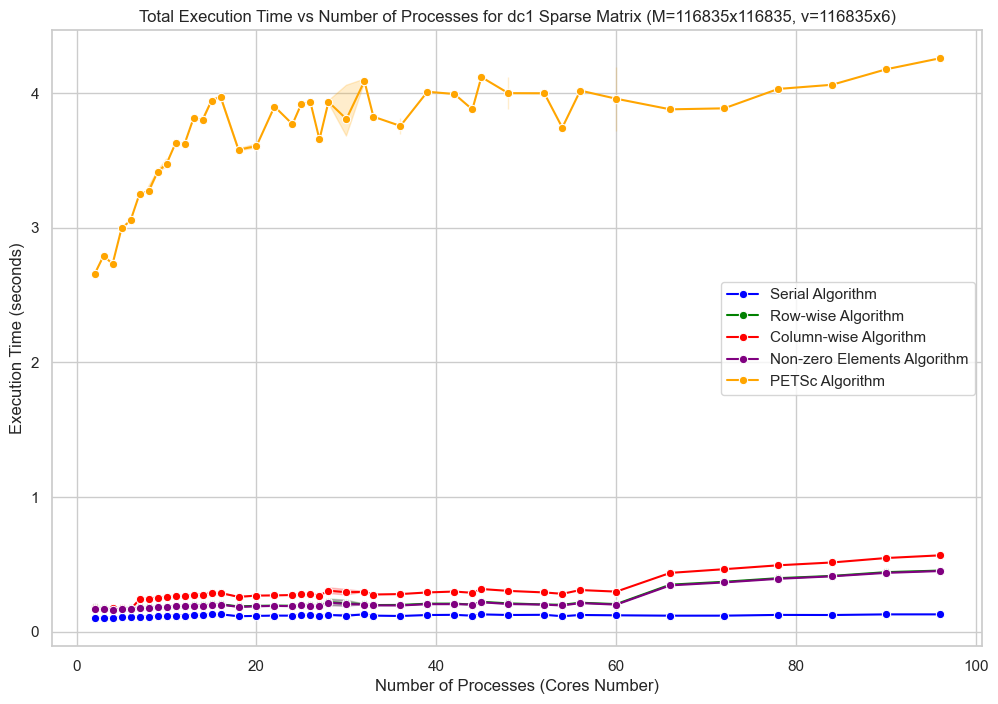

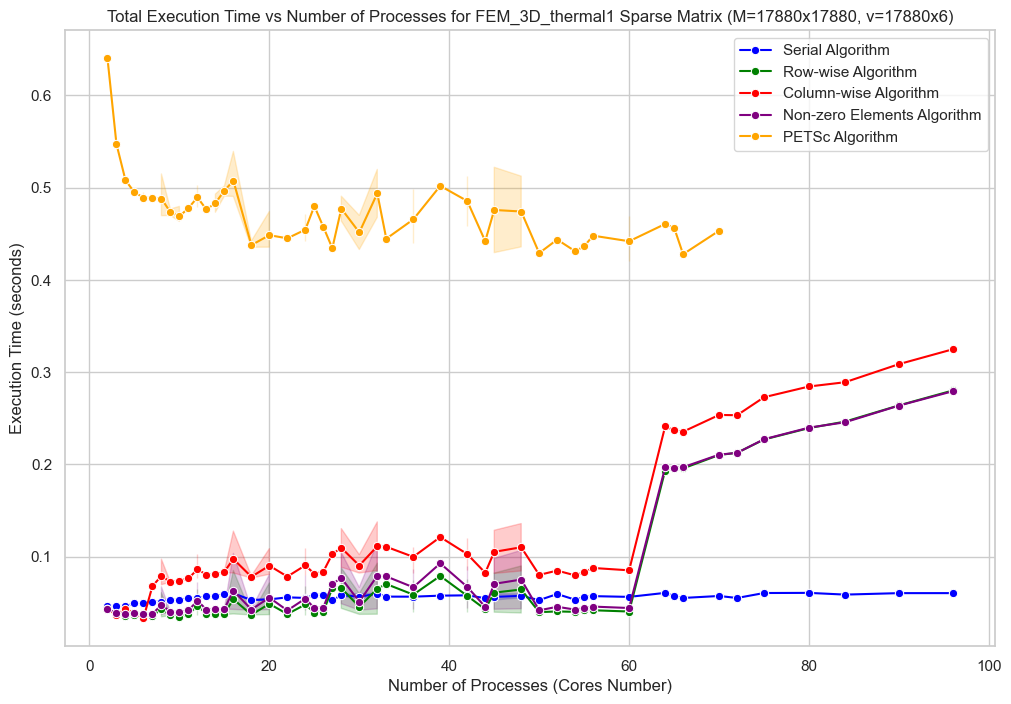

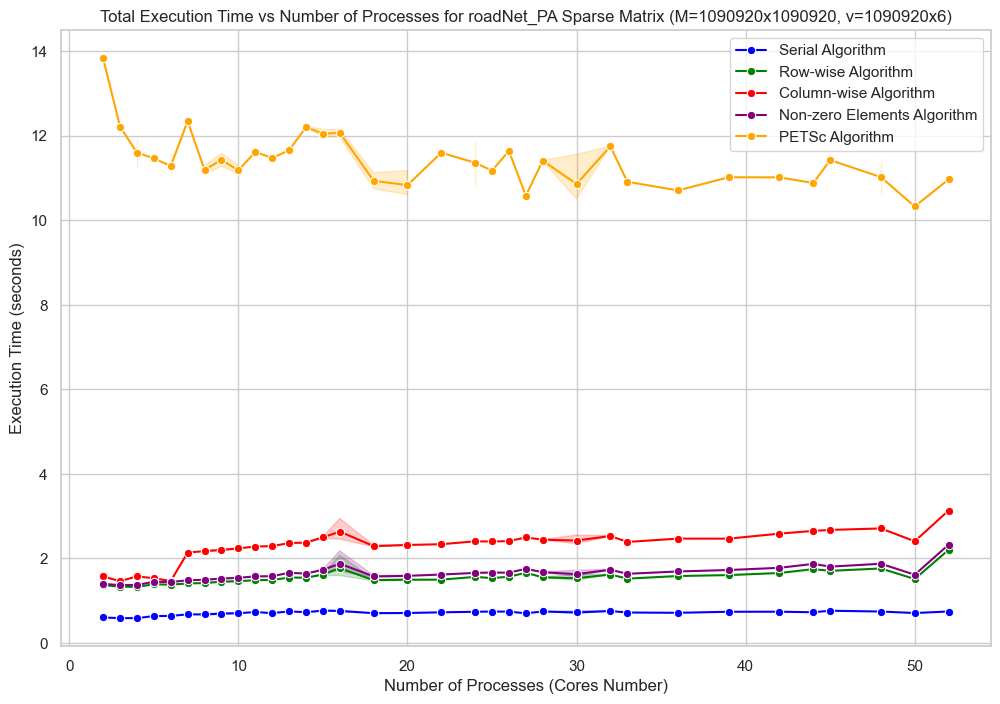

In [ ]:
for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(x='Cores Number', y='Serial Algo Execution time', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
    sns.lineplot(x='Cores Number', y='Total Row-Wise Execution Time', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
    sns.lineplot(x='Cores Number', y='Total Column-Wise Execution Time', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
    sns.lineplot(x='Cores Number', y='Total Non-zero Elements Execution Time', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
    sns.lineplot(x='Cores Number', y='Total PETSc Execution Time', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f"Total Execution Time vs Number of Processes for {name} Sparse Matrix (M={df_sorted["Sparse Matrix"].iloc[0]}, v={df_sorted["Dense Vector"].iloc[0]})")
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('./matrix_dim/' + name + '_k6_total_execution_time.png')

    plt.show()

In [ ]:
df["Sparse Matrix Name"].unique()

array(['amazon0302', 'cage4', 'cop20k_A', 'dc1', 'FEM_3D_thermal1',
       'roadNet_PA'], dtype=object)

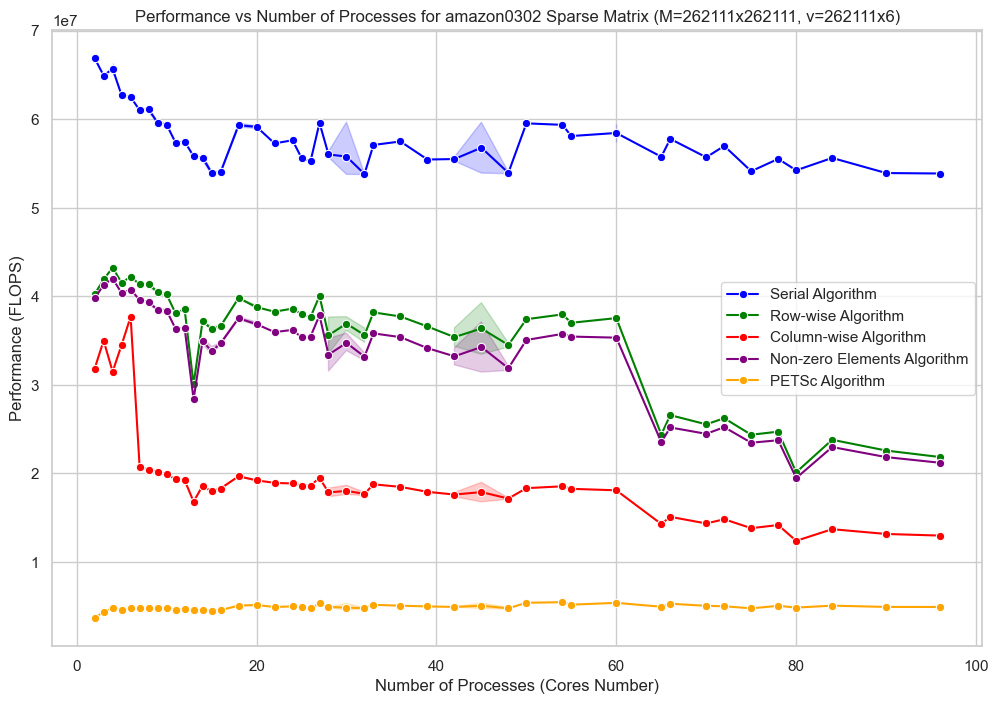

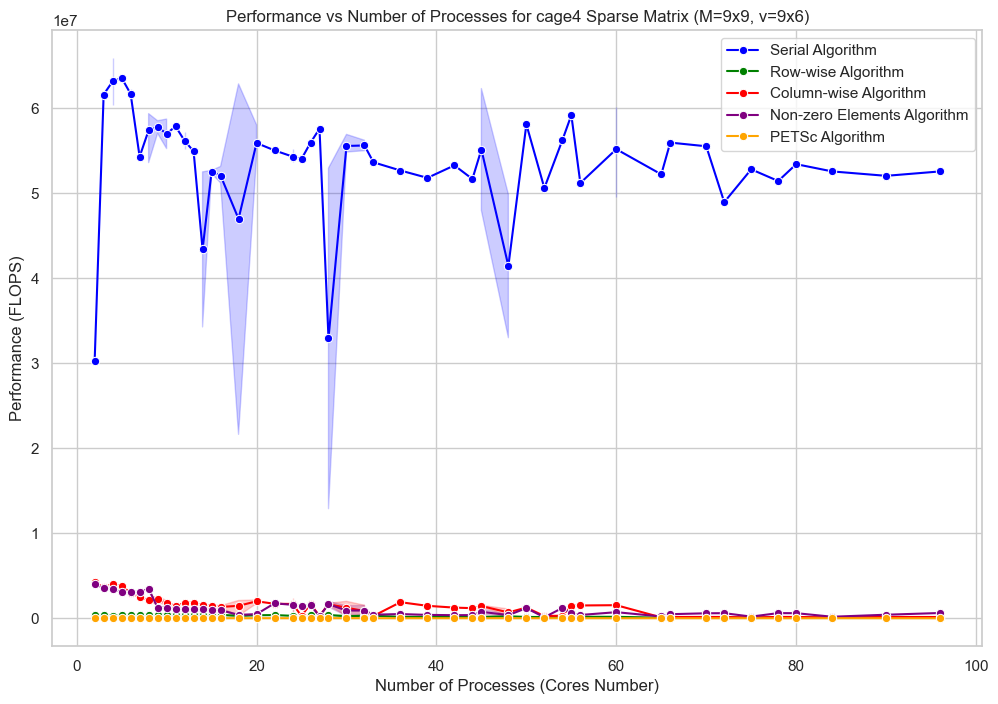

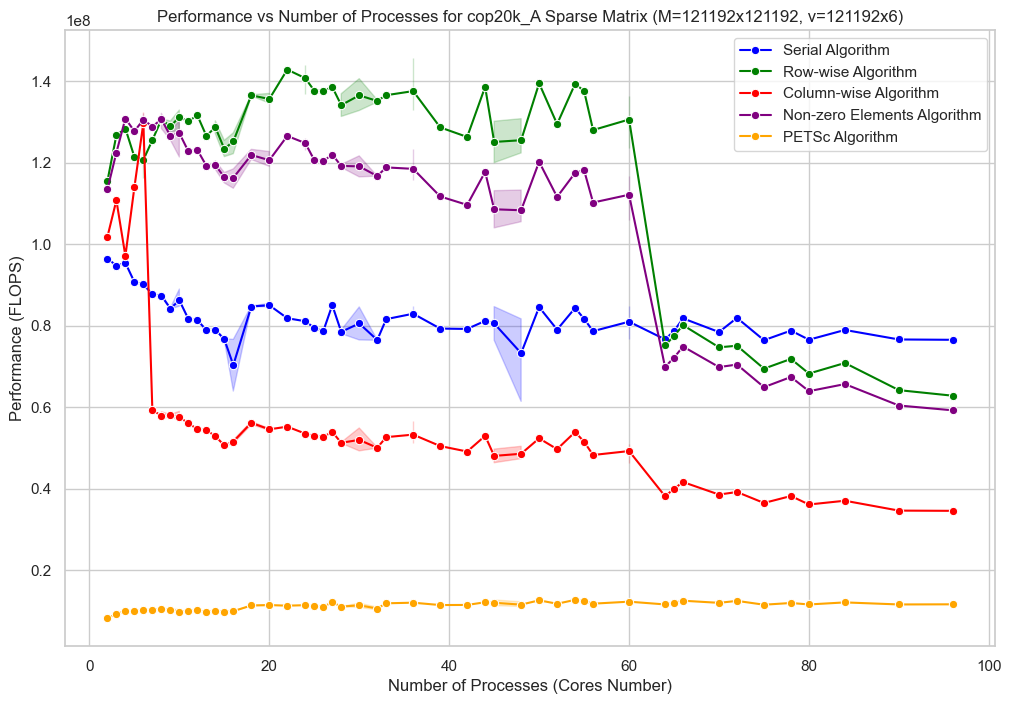

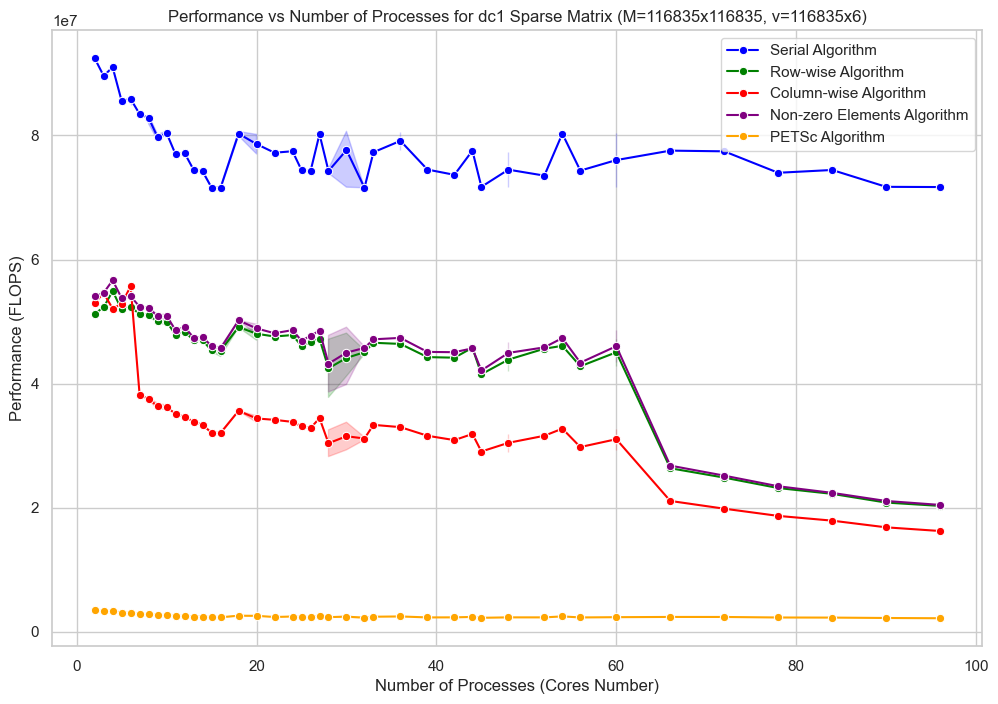

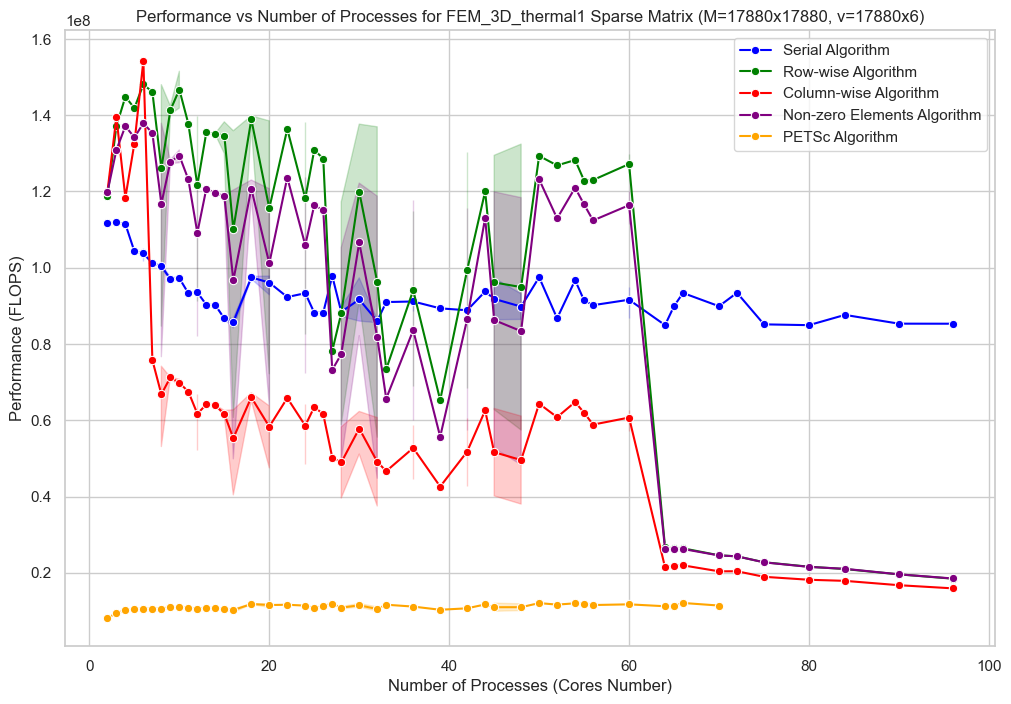

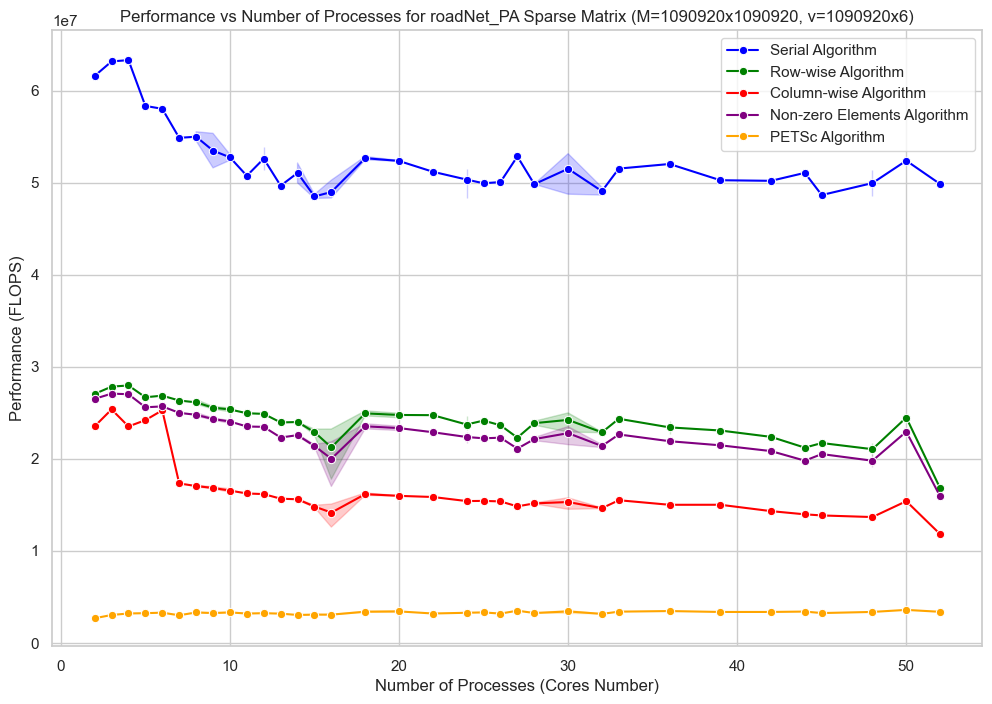

In [ ]:
# Performance in FLOPS

# Number of non-zero elements in the sparse matrix 
NZ = {
    "cop20k_A": 2624331,
    "roadNet_PA": 3083796,
    "FEM_3D_thermal1": 430740,
    "dc1": 766396,
    "cage4": 49,
    "amazon0302": 1234877
}

df['PETSc Performance'] = df.apply(lambda row: (2 * NZ[row["Sparse Matrix Name"]] * row['k']) / row['Total PETSc Execution Time'], axis=1)
df['Non-zero Elements Performance'] = df.apply(lambda row: (2 * NZ[row["Sparse Matrix Name"]] * row['k']) / row['Total Non-zero Elements Execution Time'], axis=1)
df['Column-wise Performance'] = df.apply(lambda row: (2 * NZ[row["Sparse Matrix Name"]] * row['k']) / row['Total Column-Wise Execution Time'], axis=1)
df['Row-wise Performance'] = df.apply(lambda row: (2 * NZ[row["Sparse Matrix Name"]] * row['k']) / row['Total Row-Wise Execution Time'], axis=1)
df['Serial Algo Performance'] = df.apply(lambda row: (2 * NZ[row["Sparse Matrix Name"]] * row['k']) / row['Serial Algo Execution time'], axis=1)


for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(x='Cores Number', y='Serial Algo Performance', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
    sns.lineplot(x='Cores Number', y='Row-wise Performance', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
    sns.lineplot(x='Cores Number', y='Column-wise Performance', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
    sns.lineplot(x='Cores Number', y='Non-zero Elements Performance', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
    sns.lineplot(x='Cores Number', y='PETSc Performance', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Performance (FLOPS)')
    plt.title(f"Performance vs Number of Processes for {name} Sparse Matrix (M={df_sorted["Sparse Matrix"].iloc[0]}, v={df_sorted["Dense Vector"].iloc[0]})")
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('./matrix_dim/' + name + '_k6_performance.png')

    plt.show()

In [11]:
names = df["Sparse Matrix Name"].unique()
for name in names:
    # Filtering the dataframe based on the 'Sparse Matrix Name'
    df_filtered = df[df["Sparse Matrix Name"] == name].sort_values(by='Cores Number')

    # Sorting the dataframe based on 'Cores Number' for better plotting
    df_sorted = df_filtered.sort_values(by="Cores Number")

    nz_results = df_sorted[['Cores Number', 'Non-zero Elements Result']]
    col_results = df_sorted[['Cores Number', 'Column-wise Result']]
    row_results = df_sorted[['Cores Number', 'Row-wise Result']]
    petsc_results = df_sorted[['Cores Number', 'PETSc Result']]

    nz_results = nz_results[nz_results['Non-zero Elements Result'] == "different"]
    col_results = col_results[col_results['Column-wise Result'] == "different"]
    row_results = row_results[row_results['Row-wise Result'] == "different"]
    petsc_results = petsc_results[petsc_results['PETSc Result'] == "different"]
    

    print(f"Number of different results for {name} Sparse Matrix with Non-zero Elements Algorithm: {nz_results.shape[0]}")
    print(f"Number of different results for {name} Sparse Matrix with Column-wise Algorithm: {col_results.shape[0]}")
    print(f"Number of different results for {name} Sparse Matrix with Row-wise Algorithm: {row_results.shape[0]}")
    print(f"Number of different results for {name} Sparse Matrix with PETSc Algorithm: {petsc_results.shape[0]}")

Number of different results for amazon0302 Sparse Matrix with Non-zero Elements Algorithm: 0
Number of different results for amazon0302 Sparse Matrix with Column-wise Algorithm: 0
Number of different results for amazon0302 Sparse Matrix with Row-wise Algorithm: 0
Number of different results for amazon0302 Sparse Matrix with PETSc Algorithm: 0
Number of different results for cage4 Sparse Matrix with Non-zero Elements Algorithm: 0
Number of different results for cage4 Sparse Matrix with Column-wise Algorithm: 0
Number of different results for cage4 Sparse Matrix with Row-wise Algorithm: 0
Number of different results for cage4 Sparse Matrix with PETSc Algorithm: 0
Number of different results for cop20k_A Sparse Matrix with Non-zero Elements Algorithm: 0
Number of different results for cop20k_A Sparse Matrix with Column-wise Algorithm: 0
Number of different results for cop20k_A Sparse Matrix with Row-wise Algorithm: 0
Number of different results for cop20k_A Sparse Matrix with PETSc Algori